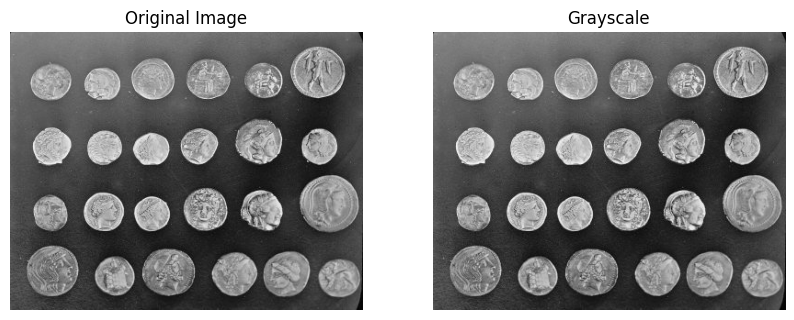

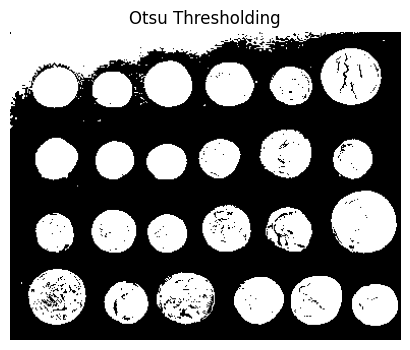

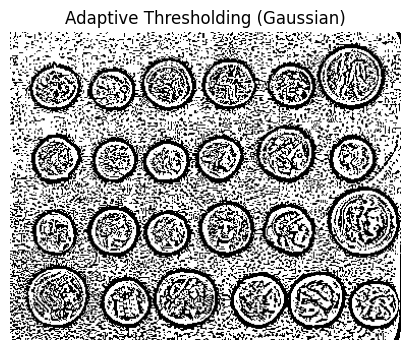

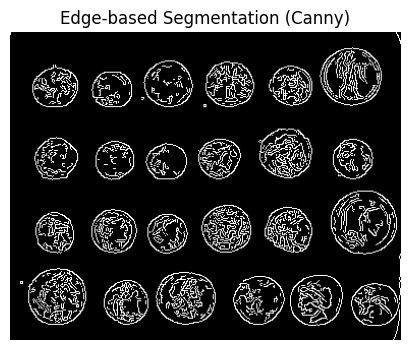

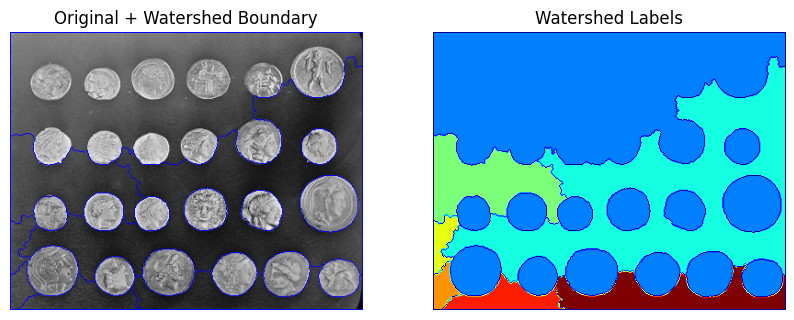

In [1]:
from skimage import data
import cv2
import numpy as np
from matplotlib import pyplot as plt

# --- 1. Membaca dan menampilkan gambar ---
# Anda bisa ganti dengan gambar lain
coins = data.coins()
img = cv2.cvtColor(coins, cv2.COLOR_GRAY2BGR)
gray = coins.copy()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale')
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# --- 2. Global Thresholding (Otsu) ---
ret, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(8, 4))
plt.title("Otsu Thresholding")
plt.imshow(otsu, cmap='gray')
plt.axis('off')
plt.show()

# --- 3. Adaptive Thresholding ---
adaptive = cv2.adaptiveThreshold(
   gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
   cv2.THRESH_BINARY, 11, 2
)

plt.figure(figsize=(8, 4))
plt.title("Adaptive Thresholding (Gaussian)")
plt.imshow(adaptive, cmap='gray')
plt.axis('off')
plt.show()

# --- 4. Edge-based Segmentation (Canny Edge Detection) ---
edges = cv2.Canny(gray, 100, 200)

plt.figure(figsize=(8, 4))
plt.title("Edge-based Segmentation (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

# --- 5. Watershed Segmentation ---
# Langkah-langkah:
# a. Threshold biner
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# b. Noise removal dengan morfologi
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# c. Area background yang pasti
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# d. Area foreground yang pasti
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# e. Area yang tidak diketahui
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# f. Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# g. Terapkan algoritma watershed
markers = cv2.watershed(img, markers)
result = img.copy()
result[markers == -1] = [255, 0, 0]  # batas obyek ditandai merah

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original + Watershed Boundary')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Watershed Labels')
plt.imshow(markers, cmap='jet')
plt.axis('off')
plt.show()